<h1>Bifurkation der Logistischen Gleichung</h1>
Lars Zimmer, 01.02.2021

<h2>Die Logistische Gleichung</h2>
Die Logistische Gleichung diente ursprünglich als mathematisches Modell zur Berechnung von Populationen.$^{[1]}$
Man überlegte sich die derzeitige Population $x_{n}$ mit der Wachstumsrate $r$ zu multiplizieren. Um die Todesrate darzustellen wurde ein weiterer Multiplikator in Abhängigkeit der Population benötigt. 
Da dieser nicht zum Wachstum beitragen soll, wurde mit $(1-x_{n})$ multipliziert.

Damit ergibt sich aus dem Term $r*x_{n}*(1-x_{n})$ die Folgepopulation $x_{n+1}$ und somit die Logistische Gleichung:

$x_{n+1} = r*{x_n}*(1-{x_n})$

Die Population $x_{n}$ stellt hierbei einen Prozentsatz des theoretischen Maximums dar. Je größer die Population, desto mehr sterben auch beim nächsten Iterationsschritt.

Es handelt sich im Prinzip um eine sehr simple mathematische Funktion mit einer negativen Rückkopplungsschleife.$^{[2]}$

Wie auch bei anderen Funktionen mit negativen Rückkopplungsschleifen wäre auch hier nach einigen Iterationsschritten mit dem Finden eines Equilibriums in Abhängigkeit von der Wachstumsrate zu rechnen.

Im Folgenden werden die Ergebnisse beim Iterieren über diese Gleichung mit verschiedenen Wachstumsraten demonstriert.

<h2>Implementierung</h2>

<h3>Imports</h3>
Für Benutzerinteraktionen werden "ipywidgets" sowie "display" aus der IPython Bibliothek importiert.
"matplotlib" wird zur Darstellung von Graphen verwendet. Zur interaktion mit den hierdurch generierten Graphen wurde das "nbagg" backend verwendet, während "numpy" im Folgenden zum Erzeugen verschiedener Arrays verwendet wird.

In [1]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

<h3>Logistische Gleichung</h3>
Zunächst wird die Logistische Gleichung als Funktion zum Berechnen des Folgewertes in Abhängigkeit von der Wachstumsrate r, so wie den vorherigen Wert x definiert.

In [2]:
def logistic(r, x):
    return r * x * (1 - x)

<h3>Testparameter</h3>
Anschließend werden einige Testparameter festgelegt. So sollen 10000 (n) Werte zwischen 0 und 4 als Wachstumsrate dienen.
Für jeden dieser Werte für die Wachstumsrate wird eine Iterationskette, ausgehend vom Startwert 0.001 (x) gestartet.
Hierbei durchläuft jede Iterationskette 1000 Iterationen (iterations), wobei nur die letzten 100 (last) im Graphen dargestellt werden.

Hierdurch soll der Verlauf des Equilibriums, den die logistische Gleichung bei verschiedenen r-Werten erreicht, gezeigt werden.

In [3]:
n = 10000
r = np.linspace(0.0, 4.0, n)
x = 0.001 * np.ones(n)
iterations = 1000
last = 100

<h3>Funktion zur Erstellung des Graphen</h3>
Zur Erstellung des Graphen wird die Funktion "plot" definiert. Um das Ergebnis besser erkennen zu können, wird eine Figur mit Zwei Graphen erstellt. Die Erste zeigt die x-Achse von 0 bis 4, während die Zweite nur von 3 bis 4 geht.

Zum Einzeichnen der Punkte wurde eine einfache for-Schleife über die Anzahl der Iterationen verwendet. 
Innerhalb dieser Schleife werden die Folgewerte $x_{n+1}$ (x) auf Basis unserer Funktion für die Logistische Gleichung (logistic) mit allen Wachstums- und Start- bzw. aktuellen Werten $x_{n}$ berechnet.

Falls wir bei den letzten 100 (last) Iterationsschritten angekommen sind, werden die Ergebnisse in beide Graphen eingetragen.

In [4]:
def plot(n, r, iterations, last, x):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9), sharex=False)

    for i in range(iterations):
        x = logistic(r, x)
        if i >= (iterations - last):
            ax1.plot(r, x, ',k', alpha=.25)
            ax2.plot(r, x, ',k', alpha=.25)

    ax1.set_xlim(0.0, 4)
    ax2.set_xlim(3, 4)
    plt.xlabel("Wachstumsrate r")
    plt.ylabel("Prozentsatz der theoretisch maximalen Population")
    ax1.set_title("Bifurkation der Logistischen Gleichung")

<h3>Bifurkationsdiagramm</h3>

<h4>Beschreibung des regulären Teiles</h4>
Das ausführen der Funktion zur Erschaffung des Graphen mit den zuvor festgelegten Parametern erzeugt das folgende Bild.

Wie zu sehen ist, stirbt die Population bei einer Wachstumsrate von unter eins auf Dauer aus.

Bei Wachstumsraten zwischen eins und etwa drei steigt die Population bis auf etwa 70% der theoretischen Maximalpopulation an, die Steigung flacht aber ab.

<h4>Die Bifurkation</h4>
Bei Werten zwischen 3 und 3.5 gibt es plötzlich kein Equilibrium mehr, sondern zwei verschiedene Werte zwischen denen die Population immer hin und her springt.

Diese zwei Werte teilen sich ab etwa 3.5 wieder auf. Nun sind es vier Werte, zwischen denen die Population hin und her springt. 

Eine Verzweigung, wie sie in diesem Bild zu sehen ist, nennt sich in der Mathematik Bifurkation (eng. bifurcation).

<h4>Das Chaos</h4>
In einem kleinen Bereich gibt es anschließend acht Werte und danach scheint es erstmals nur noch Chaos zu geben.
Ober und Untergrenzen sind zwar noch deutlich erkennbar, aber dazwischen scheinen alle möglichen Werte mal ein Ergebnis zu sein.

An einigen Stellen sind innerhalb dieser Masse an Punkten nochmals weiße Streifen zu erkennen, wo weniger verschiedene Ergebnisse erreicht werden und wenn man an diesen Stellen genau hinschaut, sieht man, dass sich das Muster wiederholt. Es sind plötzlich wieder klare Linien zu erkennen, die sich wieder in zweier Potenzen aufteilen, bis es wieder im Chaos endet.

Während bei Werten für "r" zwischen 3,6 und 3,8 auch im Chaos noch einige Linien zu erkennen, mit einer höheren Dichte an Punkten zu erkennen sind, verschwimmen diese bei steigenden Werten für "r" immer weiter.

Die Bifurkation der Logistischen Gleichung ist ein einfaches Beispiel dafür, wie komplexes, chaotisches Verhalten aus einer Gleichung entstehen kann.$^{[1]}$ In der Vergangenheit wurden sie auch als Generator für Pseudozufallszahlen verwendet.
Inzwischen werden aber normalerweise kryptografisch bessere Modelle verwendet.

<h4>Fraktal</h4>
Werden viele Werte für die Wachstumsrate "r" erzeugt, so wird beim Vergrößern des Bildes deutlich, dass es sich hierbei um ein Fraktal, also eine Struktur, die aus verkleinerten Kopien seiner selbst besteht, handelt.

<h4>Feigenbaumkonstante</h4>
Teilt man die Breite der Bifurkationsabschnitte bzw. der Gabelungen durch die des darauf folgenden Abschnittes, so erhält man eine Reihe von Zahlen, die sich der Feigenbaumkonstante (~4,669) annähern.$^{[2]}$

Die Feigenbaumkonstante findet sich nicht nur beim Iterieren über die Logistische Gleichung, sondern bei einer Vielzahl nicht-linearer Gleichungen, welche in Abhängigkeit von einem Parameter reguläres oder chaotisches Verhalten zeigen.$^{[3]}$

So weist beispielsweise die Gleichung $x_{n+1} = r*sin(x_{n})$ ebenfalls eine Bifurkation mit derselben Skalierung (Breite/Folgebreite -> 4,669) auf.$^{[2]}$

<IPython.core.display.Javascript object>


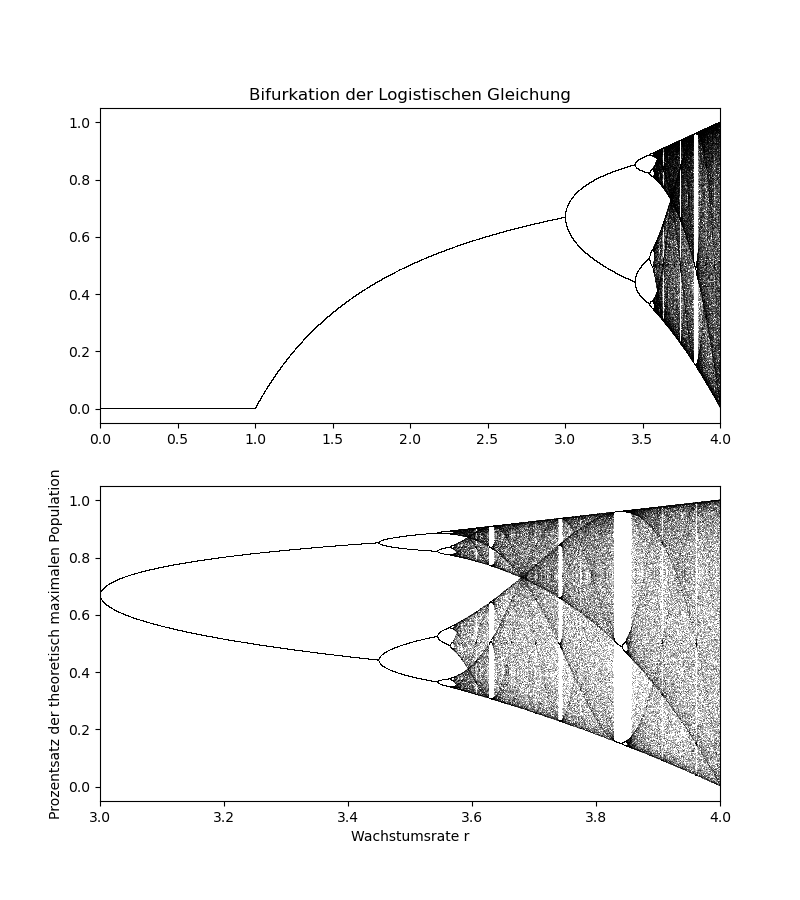

In [5]:
plot(n, r, iterations, last, x)

<h2>Interaktiver Graph</h2>
Da bislang nur Testparameter verwendet wurden, folgt nun eine interaktive Implementierung.

Zunächst wird eine weitere Figur angelegt, welche diesmal nur einen Graphen beinhaltet.
In einer "Update" Funktion (update_plot) wird mit derselben Methode wie auch zuvor ein Graph erstellt.
Die Werte für die Wachstumsrate "r" und die Arraygröße für den Startwert "x" werden in Abhängigkeit von einem Widget für "n" erzeugt.

Die Zahl aller Iterationen, die Anzahl der Iterationen, welche in den Graphen einfließen, sowie der Startwert sind ebenfalls über ein solches Widget einstellbar.
Jedes dieser Widgets erlaubt es, die Werte sowohl mittels eines Sliders, als auch durch Doppelklick auf den angezeigten Wert zu bearbeiten.

Ein Button, beschriftet mit "Show Plot", ermöglicht den Aufruf der "update_plot" Funktion mit Übergabe der eingestellten Parameter.

Das "nbagg" Backend von matplotlib ermöglicht es außerdem in den Graphen zu "zoomen", ihn zu verschieben, vor und zurück zu vorherigen Ansichten zu springen und den Graphen als Bild zu speichern.

Somit es auch möglich, sich die Bifurkation der Logistischen Gleichung mit anderen Startparametern anzusehen oder aber Sonderfälle wie bei einem Startwert von 1 zu betrachten oder beispielsweise alle Iterationen einzuzeichnen.

<IPython.core.display.Javascript object>


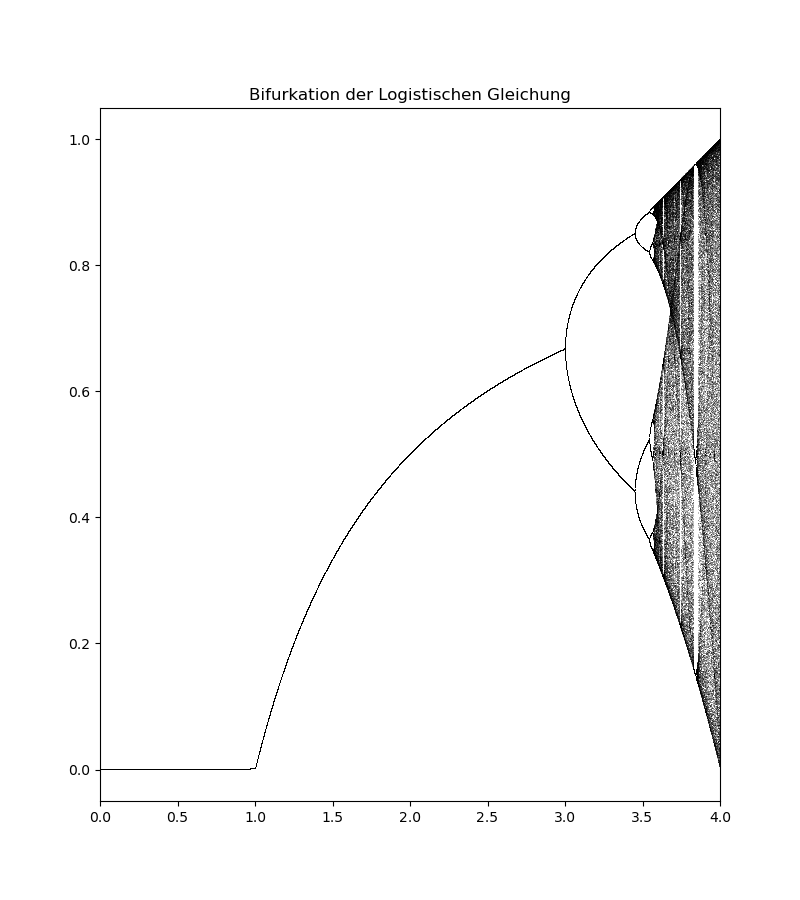

IntSlider(value=10000, description='n:', max=20000, min=5)

IntSlider(value=1000, description='Iterationen:', max=10000, min=1)

IntSlider(value=100, description='gewertet:', max=10000, min=1)

FloatSlider(value=0.01, description='Startwert', max=1.0, min=0.001, step=0.001)

Button(description='Show Plot', style=ButtonStyle())

In [6]:
fig, ax = plt.subplots(1, figsize=(8, 9))

def update_plot(n, iterations, last, x):
    r = np.linspace(0.0, 4.0, n)
    x = x * np.ones(n)   
    ax.clear()
    for i in range(iterations):
        x = logistic(r, x)
        if i >= (iterations - last):
            ax.plot(r, x, ',k', alpha=.25)
    ax.set_xlim(0.0, 4)
    ax.set_title("Bifurkation der Logistischen Gleichung")
    plt.xlabel("Wachstumsrate r")
    plt.ylabel("Prozentsatz der theoretisch maximalen Population")
    plt.show()


nS=widgets.IntSlider(value=10000, min=5, max=20000, step=1, description='n:')
iterationsS=widgets.IntSlider(value=1000, min=1, max=10000, step=1, description='Iterationen:')
lastS=widgets.IntSlider(value=100, min=1, max=10000, step=1, description='gewertet:')
xS=widgets.FloatSlider(value=1e-2, min=1e-3, max=1, step=1e-3, description='Startwert')

button = widgets.Button(description="Show Plot")
def on_button_clicked(b): 
    if(lastS.value > iterationsS.value):
        print("Es muss mindestens so viele Iterationen geben wie gewertet werden")
    else:       
        plt.cla()
        update_plot(n=nS.value, iterations=iterationsS.value, last=lastS.value, x=xS.value)
button.on_click(on_button_clicked)

display(nS)
display(iterationsS)
display(lastS)
display(xS)
display(button)

<h2>Alternative Darstellung</h2>

Im Folgenden ist eine interaktive Implementierung für eine alternative Darstellungsweise der Iteration über die Logistische Gleichung zu sehen.

Anstatt jedes einzelne Ergebnis einzuzeichnen, wurde hier der Durchschnittswert aller Iterationen jeweils für jede Wachstumsrate eingezeichnet. Die Anzahl der verschiedenen Werte, die im Laufe der Iteration für die jeweilige Wachstumsrate herausgekommen sind, wurden dabei farbcodiert.

Die Implementierung weißt hierbei zwei wesentliche Unterschiede auf:
Zum einen wurden diesmal alle y-Werte zwischengespeichert und anschließend mittels mehreren, simplen Hilfsfunktionen transformiert, um letztlich ihre Durchschnittswerte berechnen zu können und zum anderen wurden für die Darstellung der Farben eine "colormap", eine "colorbar" und eine Hilfsfunktion zum ermitteln der Anzahl unterschiedlicher Werte für die verschiedenen Wachstumsraten.

<IPython.core.display.Javascript object>


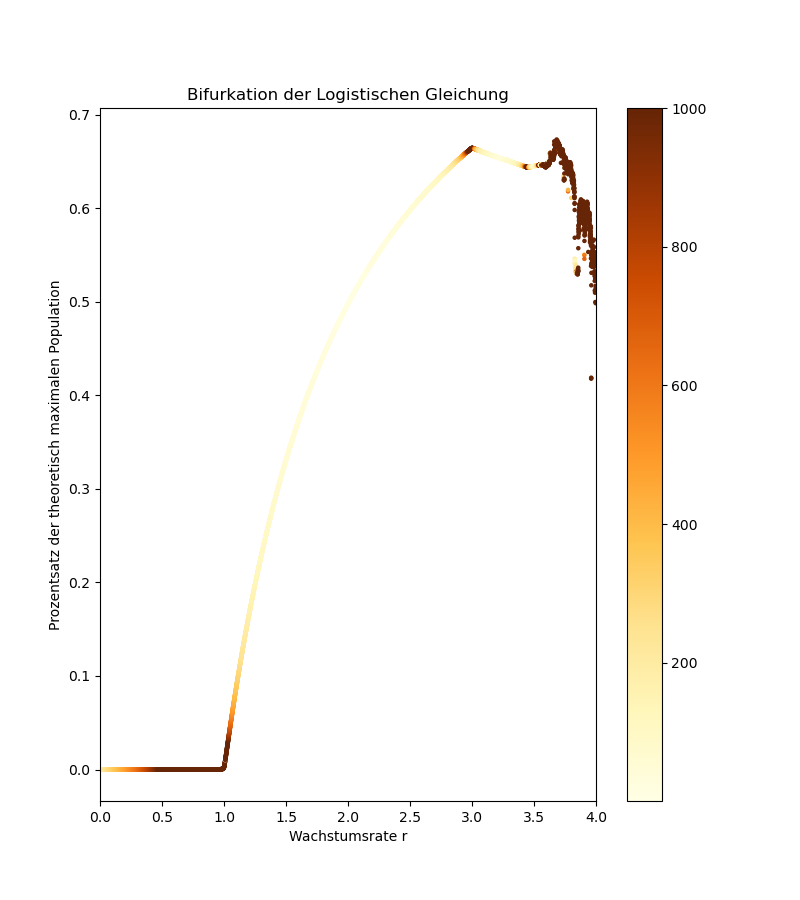

IntSlider(value=10000, description='n:', max=20000, min=5)

IntSlider(value=1000, description='Iterationen:', max=10000, min=1)

FloatSlider(value=0.01, description='Startwert', max=1.0, min=0.001, step=0.001)

Button(description='Show Plot', style=ButtonStyle())

In [7]:
fig2, ax2 = plt.subplots(1, figsize=(8, 9))
cbar = None
def plot2(n, iterations, x):
    global cbar
    r = np.linspace(0.0, 4.0, n)
    x = x * np.ones(n)   
    values = np.zeros((iterations, n))
    for i in range(iterations):        
        x = logistic(r, x)
        values[i] = x
    transformed = transform(values)
    cax = ax2.scatter(x=r, y=reduce(transformed), c = nr_of_unique_values(transformed), cmap = plt.get_cmap("YlOrBr"), s=5)
    ax2.set_xlim(0.0, 4)
    ax2.set_title("Bifurkation der Logistischen Gleichung")
    cbar = plt.colorbar(cax)
    plt.xlabel("Wachstumsrate r")
    plt.ylabel("Prozentsatz der theoretisch maximalen Population")    
    plt.show()

    
def average(ar):
    return sum(ar)/len(ar)

def nr_of_unique_values(ar):
    unique = np.zeros(len(ar))
    for i in range(len(ar)):
        unique[i] = len(set(ar[i]))
    return unique

def reduce(ar):
    reduced = np.zeros(len(ar))
    for i in range(len(ar)):
        reduced[i] = average(ar[i])
    return reduced

def transform(ar):
    transformed = np.zeros(shape=(ar.shape[1], ar.shape[0]))
    for i in range(len(ar)):
        for j in range(len(ar[0])):
            transformed[j][i] = ar[i][j] 
    return transformed   

button2 = widgets.Button(description="Show Plot")

def on_button_clicked2(b):
    if(cbar != None):
        cbar.remove()
    plt.cla()
    plot2(n=nS.value, iterations=iterationsS.value, x=xS.value)
        
button2.on_click(on_button_clicked2)


display(nS)
display(iterationsS)
display(xS)
display(button2)

<h2>Abschließende Bemerkungen</h2>

<h3>verwendete Werkzeuge</h3>

- <b>ipywidgets</b>: Die Widgets an sich funktionieren gut, die Implementierungen sind aber teils etwas fragwürdig, so scheinen Boxen wie HBox und VBox nicht innerhalb einer Funktion erstellbar zu sein. Ebenso schienen die Parameter visibility und display keinen Effekt zu haben. Wie genau man mit den Boxen arbeiten soll, ist ebenfalls nicht eindeutig, da die Dokumentation unter https://ipywidgets.readthedocs.io/ nicht besonders informativ ist.
- <b>matplotlib</b>: Matplotlib ist eine hervorragende Bibliothek zum Erstellen von Graphen, die alles konnte, was im Kontext dieser Arbeit erwartet wurde und mit dem "nbagg" Backend diese Erwartungen nochmals übertraf.
- <b>numpy</b>: Numpy wurde zwar nur zum Füllen von Arrays verwendet, hat die Arbeit aber vereinfacht.
    
- <b>jupyter Notebooks</b>:
    Jupyter Notebooks bieten eine gute Möglichkeit, interaktive Dokumente zu erstellen. Mein Hauptkritikpunkt wären Abstürze.
    Mit einer kurzzeitigen 100 prozentigen Auslastung eines Prozessorkerns ist bei Millionen von Rechenoperationen zwar zu rechnen, es wäre aber dennoch sinnvoll, wenn dies nicht zum Absturz des Webservers, sämtlicher Browser, der explorer.exe von Windows und einigen weiteren Windowsprozessen führen würde.

<h3>Kritischer Rückblick und verworfene Lösungsansätze</h3>

Die verwendeten Ansätze haben größtenteils gut funktioniert. 

Das Hauptproblem war der vom Code erzeugte Output.
Anfänglich wurden durch den "Show Plot" Button nur neue Graphen an den Output angehangen, statt den Graphen selbst zu ersetzten. Dies wurde temporär mittels "clear_output" gelöst, hatte aber den Nachteil, dass die Slider und der Button mit gelöscht wurden. 

Die "display" Funktion mit den jeweiligen Elementen nach dem Löschen des Outputs auszuführen war zwar ursprünglich kein Problem, nach der Verwendung von "VBox" und "HBox" zur Anordnung der Elemente ging dies aber nicht mehr.
Die Boxen wurden nur durch die Erstellung angezeigt. Parameter wie "display" oder "visiblity" zu setzten hat nicht funktioniert und das Erstellen der Boxen innerhalb einer Funktion, die nach dem "clear_output" ausgeführt werden könnte, hat ebenfalls nicht geklappt.

Gelöst wurden alle Probleme letztlich durch das Verwenden des "nbagg" Backends von matplotlib, was alle zusätzlichen Funktionalitäten, die zuvor gelöscht oder nicht vernünftig anordbar waren, überflüssig machte und nicht mehr der komplette output gelöscht werden musste.


<h3>Quellen</h3>

${[1.]}$ "Logistische Gleichung - Wikipedia", https://de.wikipedia.org/wiki/Logistische_Gleichung, Abgerufen am 31.01.2021

${[2.]}$ "This equation will change how you see the world (the logistic map) - Veritasium", https://www.youtube.com/watch?v=ovJcsL7vyrk, Abgerufen am 31.01.2021

${[3.]}$ "Feigenbaum-Konstante - Wikipedia", https://de.wikipedia.org/wiki/Feigenbaum-Konstante, Abgerufen am 31.01.2021